In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec20_updated.csv')

In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [6]:
df.nunique()

ID                       1516064
Severity                       4
Start_Time               1037092
End_Time                 1161415
Start_Lat                 590611
Start_Lng                 603369
End_Lat                   587824
End_Lng                   599916
Distance(mi)               11514
Description               527655
Number                     37592
Street                     93048
Side                           2
City                       10657
County                      1671
State                         49
Zipcode                   177196
Country                        1
Timezone                       4
Airport_Code                1985
Weather_Timestamp         331748
Temperature(F)               775
Wind_Chill(F)                883
Humidity(%)                  100
Pressure(in)                1007
Visibility(mi)                74
Wind_Direction                24
Wind_Speed(mph)              121
Precipitation(in)            187
Weather_Condition            116
Amenity   

In [7]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


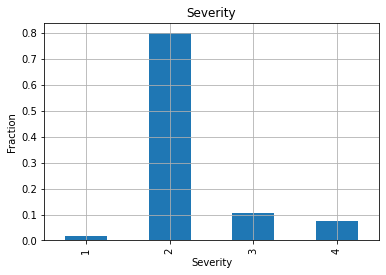

In [8]:
df.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

In [9]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 88896 non one hot metadata rows, which are 5.9% of the data


In [10]:
bools = booldf.sum(axis=0)

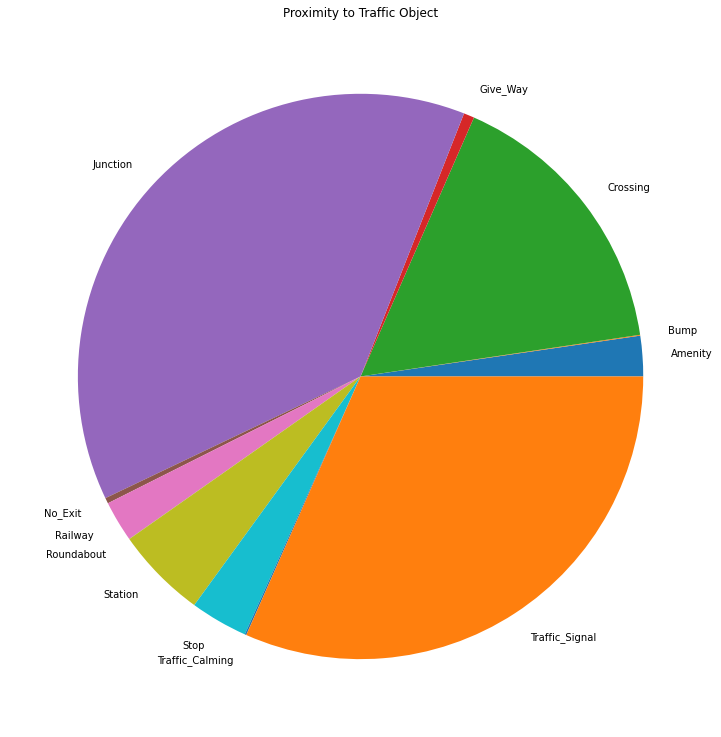

In [11]:
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

In [12]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 59.4% of the data


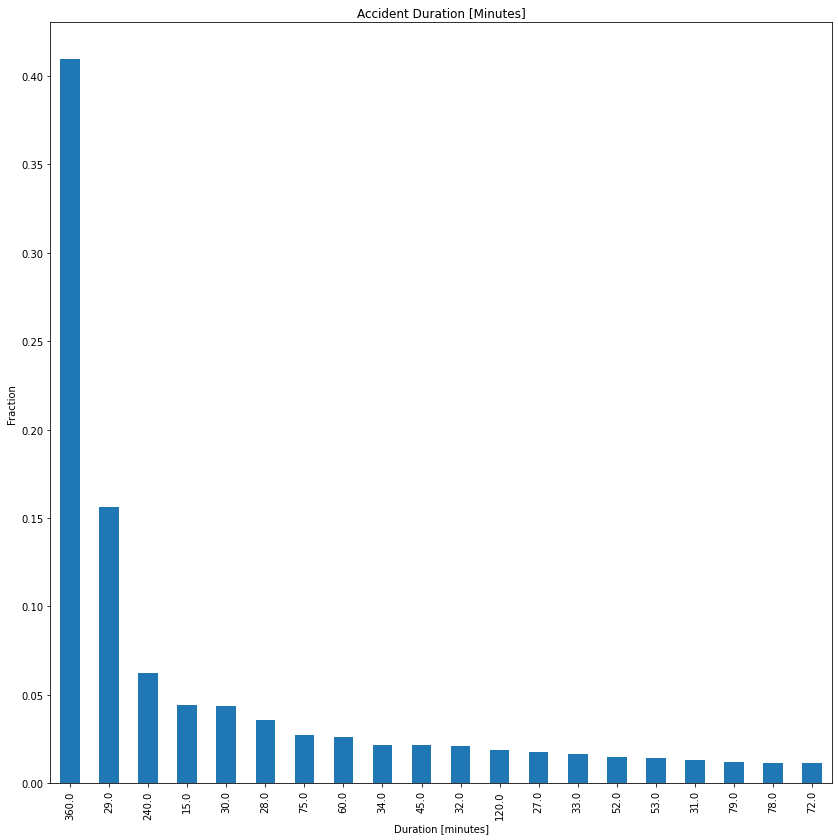

In [13]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

In [14]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 05:56:20,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:15:39,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:15:39,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:51:45,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


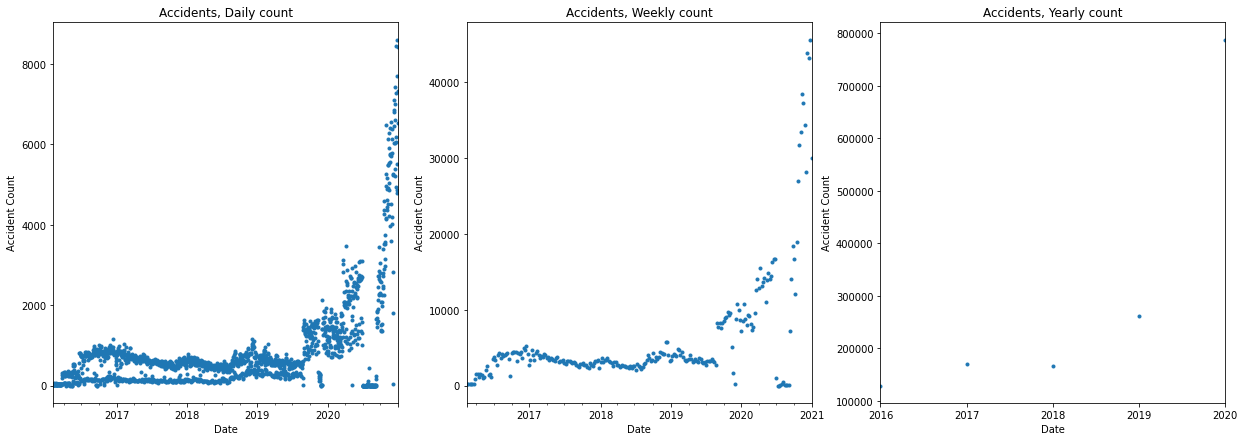

In [15]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

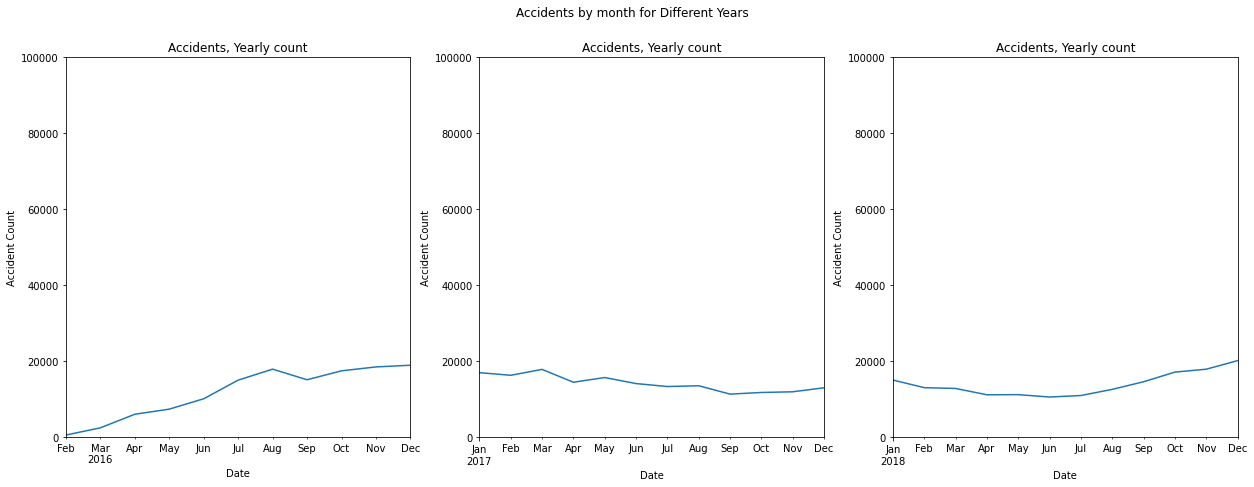

In [16]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Accidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,3,i)
    sample = df.loc[year].ID.resample('M').count()
    sample.plot()
    plt.ylim(0,100000)
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

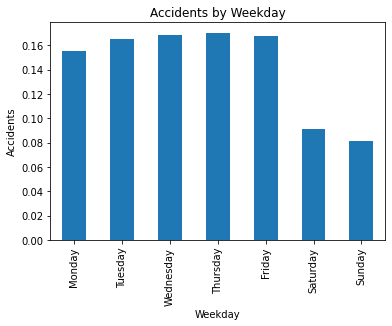

In [17]:
df['Weekday'] = df.index.day_name()
weekday = df.groupby('Weekday').ID.count()
weekday = weekday/weekday.sum()
dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday[dayOfWeek].plot.bar()
plt.title('Accidents by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Accidents');

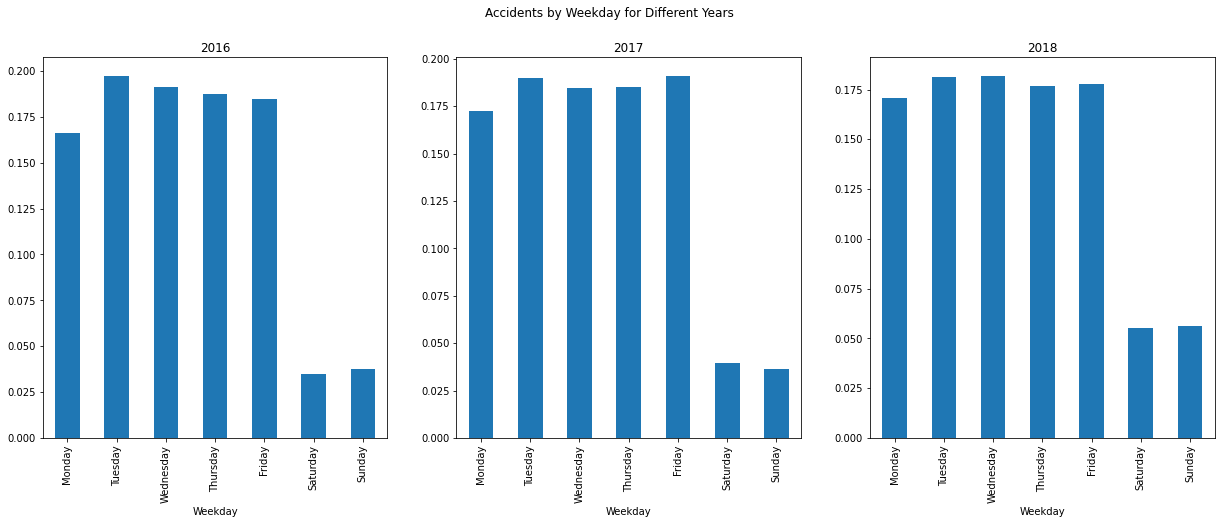

In [18]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')

fig.suptitle('Accidents by Weekday for Different Years')
plt.xlabel('Weekday')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    weekday = df.loc[year].groupby('Weekday').ID.count()
    weekday = weekday/weekday.sum()
    dayOfWeek=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.subplot(1,3,i)
    plt.title(year)
    weekday[dayOfWeek].plot.bar()

In [19]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix, fontsize=15')
    plt.show()

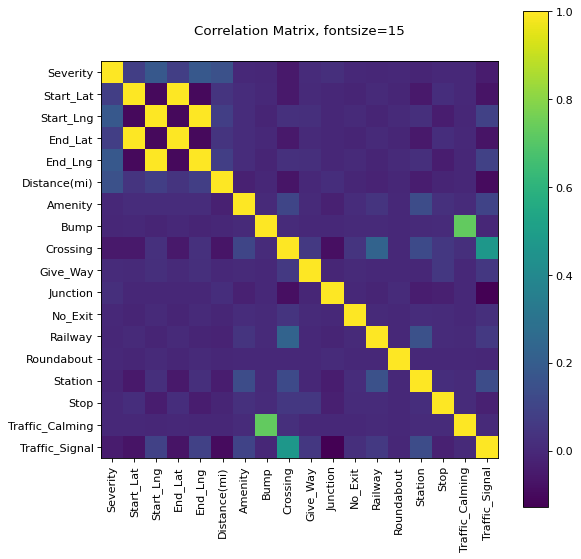

In [20]:
plotCorrelationMatrix(df, 8)

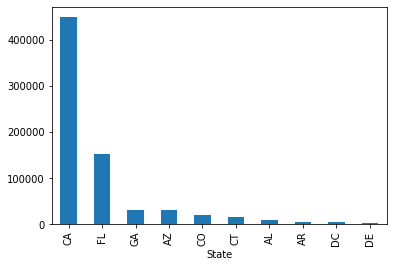

In [21]:
df.groupby('State') \
        .size() \
        .iloc[:10] \
        .sort_values(ascending=False) \
        .plot.bar()

In [22]:
df1 = df

In [23]:
df1.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [24]:
df1.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday
2016-02-08 05:56:20,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,Monday
2016-02-08 06:15:39,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday
2016-02-08 06:15:39,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,Monday
2016-02-08 06:51:45,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,Monday


In [25]:
df1 = df1.drop(['Distance(mi)', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [26]:
cols = ["End_Lat", "End_Lng", "Number"]
df1 = df1.drop(cols, axis=1)

In [27]:
df1.isnull().sum()

ID                        0
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
Timezone               2302
Weather_Timestamp     30264
Temperature(F)        43033
Wind_Chill(F)        449316
Humidity(%)           45509
Pressure(in)          36274
Visibility(mi)        44211
Wind_Direction        41858
Wind_Speed(mph)      128862
Precipitation(in)    510549
Weather_Condition     44007
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset           83
Weekday                   0
dtype: int64

In [28]:
pmean = df1['Pressure(in)'].mean()
tmean = df1['Temperature(F)'].mean()
wcmean = df1['Wind_Chill(F)'].mean()
hmean = df1['Humidity(%)'].mean()
wsmean = df1['Wind_Speed(mph)'].mean()
prmean = df1['Precipitation(in)'].mean()

In [29]:
df1['Pressure(in)']=df1['Pressure(in)'].fillna(pmean)

In [30]:
df1['Temperature(F)'] = df1['Temperature(F)'].fillna(tmean)

In [31]:
df1['Wind_Chill(F)'] = df1['Wind_Chill(F)'].fillna(wcmean)

In [32]:
df1['Humidity(%)'] = df1['Humidity(%)'].fillna(hmean)

In [33]:
df1['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(wsmean)

In [34]:
df1['Precipitation(in)']=df1['Precipitation(in)'].fillna(prmean)

In [35]:
df1.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Timezone              2302
Weather_Timestamp    30264
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)       44211
Wind_Direction       41858
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition    44007
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset          83
Weekday                  0
dtype: int64

In [36]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Timezone', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Weekday'],
      dtype='object')

In [37]:
visMode = df1["Visibility(mi)"].mode()
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)

In [38]:
#df1["Visibility(mi)"]=df1["Visibility(mi)"].fillna(visMode)
df1['Visibility(mi)'] = df1['Visibility(mi)'].fillna(df1['Visibility(mi)'].mode()[0])
df1['Wind_Direction'] = df1['Wind_Direction'].fillna(df1['Wind_Direction'].mode()[0])
df1['Weather_Condition'] = df1['Weather_Condition'].fillna(df1['Weather_Condition'].mode()[0])
#df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].fillna(df1['Sunrise_Sunset'].mode()[0])

In [39]:
df1.drop(['Timezone','Weather_Timestamp', 'Start_Time', 'End_Time', 'ID'], axis = 1, inplace = True)

In [40]:
df1.isnull().sum()

Severity              0
Start_Lat             0
Start_Lng             0
Temperature(F)        0
Wind_Chill(F)         0
Humidity(%)           0
Pressure(in)          0
Visibility(mi)        0
Wind_Direction        0
Wind_Speed(mph)       0
Precipitation(in)     0
Weather_Condition     0
Amenity               0
Bump                  0
Crossing              0
Give_Way              0
Junction              0
No_Exit               0
Railway               0
Roundabout            0
Station               0
Stop                  0
Traffic_Calming       0
Traffic_Signal        0
Turning_Loop          0
Sunrise_Sunset       83
Weekday               0
dtype: int64

In [41]:
df1.dropna(axis=0, inplace=True)

In [42]:
df1.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Weekday'],
      dtype='object')

In [43]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,SW,10.400000,0.000000,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 05:56:20,2,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,Calm,7.630812,0.020000,Light Rain,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:15:39,2,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,Calm,7.630812,0.020000,Overcast,0,0,0,0,1,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:15:39,2,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,Calm,7.630812,0.020000,Overcast,0,0,0,0,1,0,0,0,0,0,0,0,0,Night,Monday
2016-02-08 06:51:45,2,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,Calm,7.630812,0.008478,Overcast,0,0,0,0,0,0,0,0,0,0,0,0,0,Night,Monday


In [44]:
df1['Sunrise_Sunset'] = label_encoder.fit_transform(df1['Sunrise_Sunset'])
df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
df1['Wind_Direction'] = label_encoder.fit_transform(df1['Wind_Direction'])
df1['Weekday'] = label_encoder.fit_transform(df1['Weekday'])
df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,3,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,16,10.400000,0.000000,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 05:56:20,2,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,1,7.630812,0.020000,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,2,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,73,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,2,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,73,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:51:45,2,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,1,7.630812,0.008478,73,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [45]:
df1.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Weekday'],
      dtype='object')

In [46]:
Y = df1['Severity']

In [47]:
X = df1.drop(['Severity'], axis = 1)

In [48]:
X.head()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:37:08,40.10891,-83.09286,42.1,36.10000,58.0,29.76,10.0,16,10.400000,0.000000,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 05:56:20,39.86542,-84.06280,36.9,55.10976,91.0,29.68,10.0,1,7.630812,0.020000,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,39.10266,-84.52468,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,73,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:15:39,39.10148,-84.52341,36.0,55.10976,97.0,29.70,10.0,1,7.630812,0.020000,73,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
2016-02-08 06:51:45,41.06213,-81.53784,39.0,55.10976,55.0,29.65,10.0,1,7.630812,0.008478,73,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [49]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X)
train_img = pca.transform(X)
train = pd.DataFrame(train_img)
train.head()

,0,1,2,3,4
0,19.132661,12.496567,12.925544,23.525272,3.338520
1,25.598870,25.730248,-11.708999,0.528154,-12.522582
2,48.908082,23.291589,-10.916821,-3.322247,-13.274926
3,48.908250,23.291659,-10.917664,-3.321259,-13.275064
4,38.294702,-2.521422,9.737079,20.243260,-17.488974


In [50]:
train.shape

(1515981, 5)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
transform = scaler.transform(X_train)
#test_img = scaler.transform(test_img)
scalar_train = pd.DataFrame(transform)
scalar_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-1.379957,0.937782,1.522446,1.799039,-0.509461,0.522556,0.295357,0.778650,-0.116835,-0.081723,-0.711760,-0.091048,-0.01347,-0.245917,-0.04619,-0.394756,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,2.813997,0.0,-0.816879,-1.452422
1,-2.120160,0.995541,0.967265,0.000082,1.105941,0.442968,0.295357,-0.413260,0.941149,0.596272,1.265988,-0.091048,-0.01347,-0.245917,-0.04619,-0.394756,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,-0.355366,0.0,1.224172,-0.047460
2,0.706482,1.314282,1.800036,2.081093,-1.120694,0.323585,0.295357,1.308388,0.254388,-0.081723,-0.711760,-0.091048,-0.01347,-0.245917,-0.04619,-0.394756,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,-0.355366,0.0,-0.816879,-0.515781
3,0.409418,1.167734,-0.531722,-0.288164,-1.338991,0.850859,0.295357,0.248912,-0.859280,-0.081723,-0.711760,-0.091048,-0.01347,-0.245917,-0.04619,2.533207,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,-0.355366,0.0,1.224172,0.420861
4,-0.878859,0.667330,-0.087578,0.163123,1.542536,0.512608,0.295357,-1.340301,-1.416113,-0.081723,-0.711760,-0.091048,-0.01347,-0.245917,-0.04619,-0.394756,-0.033886,-0.09159,-0.005743,-0.137638,-0.108624,-0.018232,-0.355366,0.0,1.224172,-0.984101


In [59]:
scalert = StandardScaler()
# Fit on training set only.
scalert.fit(X_test)
# Apply transform to both the training set and the test set.
transformt = scalert.transform(X_test)
#test_img = scaler.transform(test_img)
scalar_test = pd.DataFrame(transformt)

In [53]:
y_train.unique()

array([3, 4, 2, 1])

In [55]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.7 kB/s 
     |████████████████████████████████| 8.8 MB 61.9 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.2.0+cu92 which is incompatible.


In [56]:
pip install hummingbird-ml

     |████████████████████████████████| 180 kB 14.5 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:39tcmalloc: large alloc 1147494400 bytes == 0x55b32b1b2000 @  0x7f6624ccf615 0x55b32885b4cc 0x55b32893b47a 0x55b32885e2ed 0x55b32894fe1d 0x55b3288d1e99 0x55b3288cc9ee 0x55b32885fbda 0x55b3288d1d00 0x55b3288cc9ee 0x55b32885fbda 0x55b3288ce737 0x55b328950c66 0x55b3288cddaf 0x55b328950c66 0x55b3288cddaf 0x55b328950c66 0x55b3288cddaf 0x55b328860039 0x55b3288a3409 0x55b32885ec52 0x55b3288d1c25 0x55b3288cc9ee 0x55b32885fbda 0x55b3288ce737 0x55b3288cc9ee 0x55b32885fbda 0x55b3288cd915 0x55b32885fafa 0x55b3288cdc0d 0x55b3288cc9ee
     |████████████████████████████████| 881.9 MB 13 kB/s 
     |████████████████████████████████| 77 kB 5.2 MB/s 
     |████████████████████████████████| 12.7 MB 81 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.2.0+cu92
    Uninstalling torch-1.2.0+cu92:
      Successfully uninstalled torch-1.2.0+cu92
ERROR: pip's d

In [57]:
from sklearn.ensemble import RandomForestClassifier
from hummingbird.ml import convert, load

In [ ]:
# import tensorflow as tf
# import neural_structured_learning as nsl

# # Prepare data.
# # (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# # x_train, x_test = x_train / 255.0, x_test / 255.0

# # Create a base model -- sequential, functional, or subclass.
# model = tf.keras.Sequential([
#     # tf.keras.Input((1,1), name='feature'),
#     #tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, input_shape=(26,), activation=tf.nn.relu),
#     tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ]
# )

# # Wrap the model with adversarial regularization.
# adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
# adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

# # # Compile, train, and evaluate.
# adv_model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])


# adv_model.fit({'feature': X_train, 'label': y_train}, batch_size=32, epochs=5)
# adv_model.evaluate({'feature': X_test, 'label': y_test})


In [ ]:
# _, accuracy = model.evaluate(X_test, y_test)
# print('Accuracy: %.2f' % (accuracy*100))

In [60]:
num_classes = 2
# X = np.random.rand(100000, 28)
# y = np.random.randint(num_classes, size=100000)

# Create and train a model (scikit-learn RandomForestClassifier in this case)
skl_model = RandomForestClassifier(n_estimators=10, max_depth=10)
skl_model.fit(scalar_train,y_train)

# Use Hummingbird to convert the model to PyTorch
model = convert(skl_model, 'pytorch')

# Run predictions on CPU
model.predict(scalar_test)

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)